In [1]:
import cymetric as cym
import matplotlib as plt 
import pandas as pd
import sys 
sys.path.insert(0, '../../transition-scenarios/scripts/')
import transition_plots as tp

/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
from cymetric import fco_metrics
from cymetric import filters
from cymetric import timeseries

In [3]:
output_file = '../cyclus-files/oat/cooling-time/ct1.sqlite'
db = cym.dbopen(output_file)
ev = cym.Evaluator(db=db,write=True)

Deployment

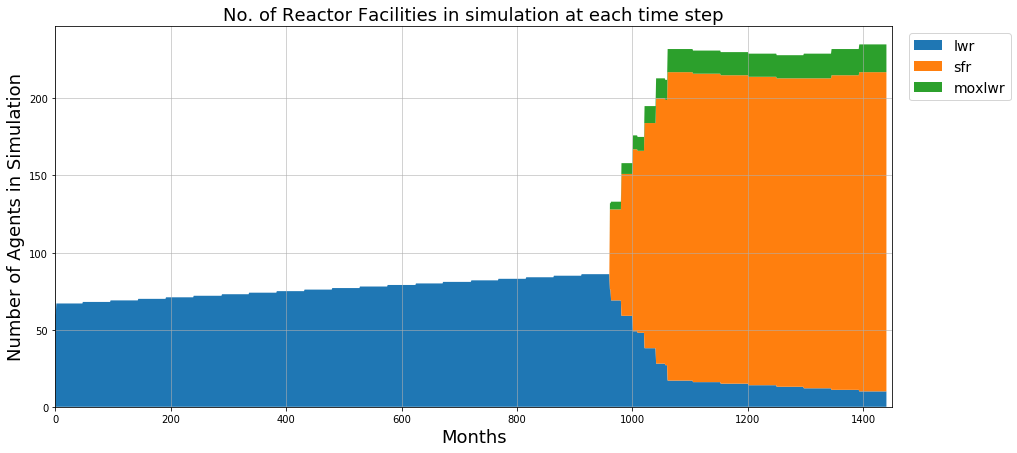

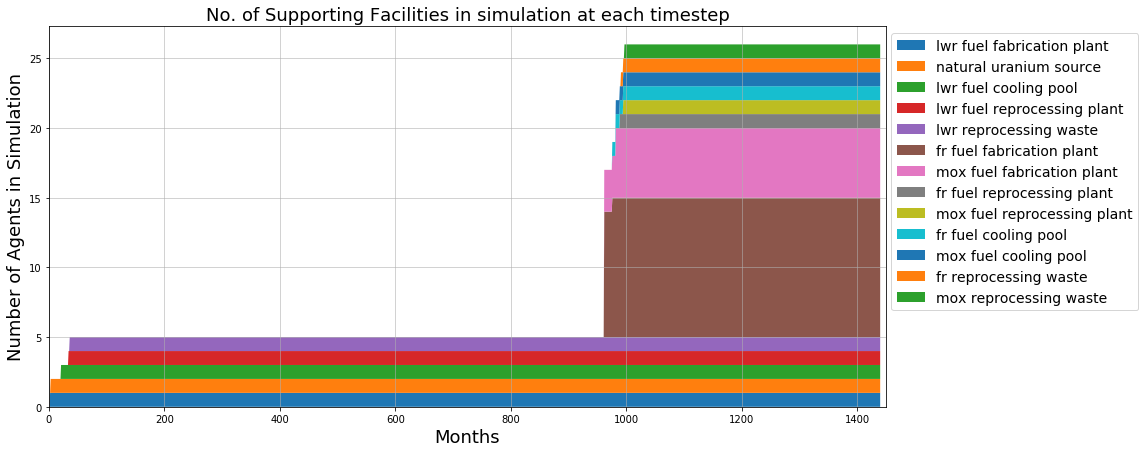

In [4]:
all_agents = tp.format_agent_dict(output_file,simple=False)
tp.plot_agents(all_agents,name='ct0',simple=False)

Electricity Production

In [5]:
ep = ev.eval('FcoMonthlyElectricityGenerated')

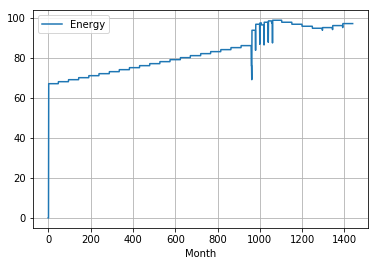

In [6]:
ep.plot(x='Month',y='Energy',grid='True')

WM: Total HLW Inventory (Final) 

In [7]:
hlw = cym.timeseries.transactions(ev,commodities=['lwrreprocessingwaste','moxreprocessingwaste','frreprocessingwaste'])
hlw = hlw['Mass'].cumsum()

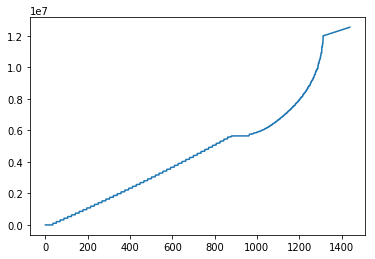

In [8]:
hlw.plot()

In [9]:
hlw.iloc[-1]

12535775.221829951

WM: Depleted Uranium (Final)

In [10]:
du = cym.timeseries.transactions(ev,commodities=['enrichmentwaste'])
du = du['Mass'].cumsum()

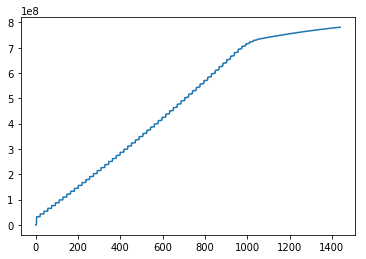

In [11]:
du.plot()

In [12]:
du.iloc[-1]

780762578.89948189

Proliferation: Pu in LWR cooling pool

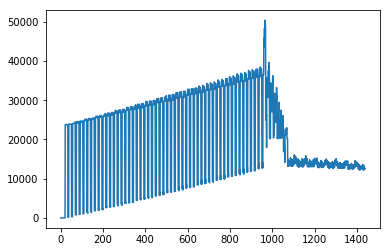

In [13]:
pu_cp_lwr_in = cym.timeseries.transactions(ev,commodities=['lwrout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
pu_cp_lwr_out = cym.timeseries.transactions(ev,commodities=['lwrstorageout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
diff = pu_cp_lwr_in-pu_cp_lwr_out
pu_cp_lwr = diff['Mass'].cumsum()
pu_cp_lwr.plot()

Proliferation: Pu in MOX LWR cooling pool

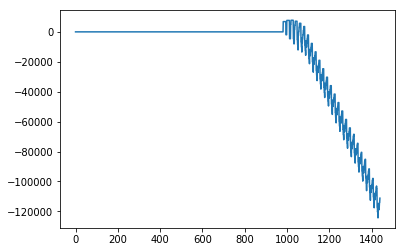

In [18]:
pu_cp_mox_in = cym.timeseries.transactions(ev,commodities=['moxout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
pu_cp_mox_out = cym.timeseries.transactions(ev,commodities=['moxstorageout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
diff = pu_cp_mox_in-pu_cp_mox_out
pu_cp_mox = diff['Mass'].cumsum()
pu_cp_mox.plot()

In [ ]:
pu_cp_mox = pu_cp_mox_in['Mass'].cumsum()
pu_cp_mox.plot()

In [ ]:
pu_cp_mox = pu_cp_mox_out['Mass'].cumsum()
pu_cp_mox.plot()

Proliferation: Pu in SFR cooling pool

In [ ]:
pu_cp_fr_in = cym.timeseries.transactions(ev,senders=['moxlwr'],receivers=['moxstorage'],commodities=['frout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
pu_cp_fr_out = cym.timeseries.transactions(ev,senders=['moxstorage'],receivers=['moxreprocessing'],commodities=['frstorageout'],nucs=['pu-238','pu-239','pu-240','pu-241','pu-242','pu-244'])
diff = pu_cp_fr_in-pu_cp_fr_out
pu_cp_fr = diff['Mass'].cumsum()
pu_cp_fr.plot()

In [ ]:
pu_cp = cym.timeseries.inventories(ev,facilities=['fr'])

In [ ]:
pu_cp.plot(x='Time',y='Quantity',grid='True')

In [ ]:
pu_cp.max()[1]

Proliferation: Pu in LWR cooling pool

In [ ]:
lwr = cym.timeseries.inventories(ev,facilities=['lwrstorage'])

In [ ]:
lwr.plot(x='Time',y='Quantity',grid='True')

Resource Utilization: Uranium Ore consumed

In [ ]:
nu = cym.timeseries.transactions(ev,commodities=['sourceout'])
nu = nu['Mass'].cumsum()

In [ ]:
nu.plot()

In [ ]:
nu.iloc[-1]